In [ ]:
# Check GPU status
!nvidia-smi

Mon Aug 12 09:06:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
# Install necessary libraries
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install tikzplotlib
!pip install grape
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setu

In [1]:
# basics
import numpy as np
import pandas as pd
import tensorflow as tf

# math
from math import ceil
from math import log
from math import log10

# utils
import itertools as it
import time
#from varname import nameof # get the name of a variable
import pickle
from tqdm.auto import tqdm, trange
#from tqdm import tqdm  RuntimeError: CUDA error: device-side assert triggered
import inspect
from grape.datasets.linqs import get_words_data # words information is excluded
from sklearn.preprocessing import LabelEncoder


# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import tikzplotlib
#from barplots import barplots
import matplotlib.colors as colors
import seaborn as sns
from sklearn.manifold import TSNE


# torch geometrics
import torch
import torch.optim as optim

from torch_geometric.datasets import FB15k_237
from torch_geometric.nn import ComplEx, DistMult, RotatE, TransE
from torch_geometric.data import Data

import os.path as osp

# Convolutional GNN
import torch_geometric.transforms as T

from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.transforms import RandomLinkSplit

from sklearn.metrics import roc_auc_score
# # Grape

2024-11-15 16:59:20.337754: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 16:59:20.388476: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 16:59:21.130752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/khushboo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook

In [2]:
# # Grape
# from grape.datasets import get_all_available_graphs_dataframe
# from grape.datasets import get_dataset
from grape import Graph
from grape import GraphVisualizer

# # Ensmallen
# from grape.embedders import Node2VecCBOWEnsmallen, Node2VecGloVeEnsmallen, Node2VecSkipGramEnsmallen
# from grape.embedders import DeepWalkCBOWEnsmallen, DeepWalkGloVeEnsmallen, DeepWalkSkipGramEnsmallen
# from grape.embedders import WalkletsSkipGramEnsmallen, WalkletsCBOWEnsmallen, WalkletsGloVeEnsmallen
# from grape.embedders import FirstOrderLINEEnsmallen, SecondOrderLINEEnsmallen
# #from grape.embedders import NetMFEnsmallen, GLEEEnsmallen, HOPEEnsmallen
from grape.embedders import TransEEnsmallen

# # TensorFlow
# from grape.embedders import SkipGramTensorFlow, CBOWTensorFlow
# from grape.embedders import FirstOrderLINETensorFlow, SecondOrderLINETensorFlow

# # KarateClub
# from grape.embedders import Role2VecKarateClub, GraRepKarateClub
# from grape.embedders import NMFADMMKarateClub, RandNEKarateClub


# # Edge prediction evaluation
from grape.edge_prediction import edge_prediction_evaluation
from grape.edge_prediction import DecisionTreeEdgePrediction, RandomForestEdgePrediction, ExtraTreesEdgePrediction, MLPEdgePrediction, GradientBoostingEdgePrediction,PerceptronEdgePrediction

# from grape.edge_prediction import KipfGCNEdgePrediction

# # Node Label prediction evaluation
# from grape.node_label_prediction import node_label_prediction_evaluation
# from grape.node_label_prediction import DecisionTreeNodeLabelPrediction, RandomForestNodeLabelPrediction, MLPNodeLabelPrediction, GradientBoostingNodeLabelPrediction#, PerceptronNodeLabelPrediction

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Load graph
view=3
view_name='VIEW'+str(view)
results = pd.DataFrame()

# Load graph
view_path='/home/khushboo/VIEW3/VIEW'+str(view)+"/"

nodes_df = pd.read_pickle(view_path+"nodes.pkl")
edges_df = pd.read_pickle(view_path+"edges.pkl")

In [5]:
# TRAIN DATASET

nodes_df.to_csv(view_path+"nodes.csv", header=False, index=False, sep='\t')
edges_df.to_csv(view_path+"edges.csv", header=False, index=False, sep='\t')

In [8]:
# IMPORT METHODS

# One-hot encoding of the types
class TypeOneHotEncoder:
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        types = set(g for col in df.values for g in col.split(self.sep))
        mapping = {type: i for i, type in enumerate(types)}

        x = torch.zeros(len(df), len(mapping))
        for i, col in enumerate(df.values):
            for type in col.split(self.sep):
                x[i, mapping[type]] = 1
        return x

# Integer encoding for types
class TypeIntegerEncoder:
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        types = set(g for col in df.values for g in col.split(self.sep))
        mapping = {type: i for i, type in enumerate(types)}

        x = torch.zeros(len(df), 1)
        for i, type in enumerate(df.values):
                x[i] = mapping[type]
        return x.to(torch.float)

In [9]:
def load_node_df(df, index_col, encoders=None, **kwargs):

    # Integer encoding for the types
    type_mapping: Dict[str, int] = {}

    df = df.set_index(index_col)
    # Create te mapping for the index
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    # Create the features for the nodes
    x = None
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x = torch.cat(xs, dim=-1)

    return x, mapping

def load_edge_df(df, src_index_col, src_mapping, dst_index_col, dst_mapping,
                 pred_index_col=None, pred_mapping=None, encoders=None, **kwargs):

    src = [src_mapping[index] for index in df[src_index_col]]
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    # Edge Types
    edge_attr = None
    # Edge mapping
    if pred_mapping is not None:
        edge_attrs = torch.zeros(len(df), 1)
        for i, type in enumerate(df[pred_index_col].values):
            edge_attrs[i] = pred_mapping[type]
        edge_attr = edge_attrs.to(torch.int64)
    # No mapping but encoder
    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    return edge_index, edge_attr

In [10]:
# Train

nodes_x, node_mapping = load_node_df(nodes_df, index_col='name',
                                     encoders={'type': TypeIntegerEncoder()}
                                    )

# Edge type mapping (same for train/test)
pred_mapping = {index: i for i, index in enumerate(edges_df.predicate.unique())}

edge_index, edge_type = load_edge_df(
    edges_df,
    src_index_col='subject', src_mapping = node_mapping,
    dst_index_col='object', dst_mapping = node_mapping,
    pred_index_col='predicate', pred_mapping = pred_mapping,
     # encoders={
     #     'predicate': TypeIntegerEncoder()
     #     }
    )

# train_data = Data(x=nodes_x,
#                   edge_index=edge_index, edge_type=edge_type,
#                   edge_label_index=edge_index,
#                   edge_label=torch.ones(edge_index.size(1))
#                     )

# train_data = train_data.to(device)

In [ ]:
data = Data(x=nodes_x, edge_index=edge_index, edge_type=edge_type)

transform = RandomLinkSplit(is_undirected=False)

train_data, val_data, test_data = transform(data)

train_data = train_data.to(device)
test_data = test_data.to(device)
val_data = val_data.to(device)

In [ ]:
print(f"Edges Train: {len(train_data.edge_label_index[0])}  Test:{len(test_data.edge_label_index[0])}  Validation: {len(val_data.edge_label_index[0])}")

Edges Train: 2378758  Test:679644  Validation: 339822


In [ ]:
# Model

model = RotatE(
    num_nodes=train_data.num_nodes,
    num_relations=train_data.num_edge_types,
    hidden_channels=50, # The hidden embedding size.
).to(device)

loader = model.loader(
    head_index=train_data.edge_index[0],
    rel_type=train_data.edge_type,
    tail_index=train_data.edge_index[1],
    batch_size=1000,
    shuffle=True,
)

optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ALTERNATIVE MODELS

# model_map = {
#     'transe': TransE,
#     'complex': ComplEx,
#     'distmult': DistMult,
#     'rotate': RotatE,
# }

# Proposed configurations
# optimizer_map = {
#     'transe': optim.Adam(model.parameters(), lr=0.01),
#     'complex': optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-6),
#     'distmult': optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-6),
#     'rotate': optim.Adam(model.parameters(), lr=1e-3),
# }

In [ ]:
# Training definitions

def train():
    model.train()
    total_loss = total_examples = 0
    for head_index, rel_type, tail_index in loader:
        optimizer.zero_grad()
        loss = model.loss(head_index, rel_type, tail_index)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * head_index.numel()
        total_examples += head_index.numel()
    return total_loss / total_examples


@torch.no_grad()
def test(data):
    model.eval()
    return model.test(
        head_index=data.edge_index[0],
        rel_type=data.edge_type,
        tail_index=data.edge_index[1],
        batch_size=20000,
        k=10,
    )

@torch.no_grad()
def get_prob(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return out.cpu().numpy()

In [ ]:
# Training
n_epochs=24

for epoch in range(1, n_epochs):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    if epoch % 23 == 0:
        rank, mrr, hits = test(val_data)
        print(f'Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, '
        f'Val MRR: {mrr:.4f}, Val Hits@10: {hits:.4f}')

Epoch: 001, Loss: 0.5150
Epoch: 002, Loss: 0.3655
Epoch: 003, Loss: 0.3070
Epoch: 004, Loss: 0.2680
Epoch: 005, Loss: 0.2400
Epoch: 006, Loss: 0.2208
Epoch: 007, Loss: 0.2085
Epoch: 008, Loss: 0.2008
Epoch: 009, Loss: 0.1963
Epoch: 010, Loss: 0.1936
Epoch: 011, Loss: 0.1921
Epoch: 012, Loss: 0.1911
Epoch: 013, Loss: 0.1906
Epoch: 014, Loss: 0.1903
Epoch: 015, Loss: 0.1900
Epoch: 016, Loss: 0.1899
Epoch: 017, Loss: 0.1898
Epoch: 018, Loss: 0.1897
Epoch: 019, Loss: 0.1897
Epoch: 020, Loss: 0.1896
Epoch: 021, Loss: 0.1896
Epoch: 022, Loss: 0.1895
Epoch: 023, Loss: 0.1895


 94%|█████████▍| 1118970/1189379 [1:17:58<04:54, 239.32it/s]

In [ ]:
# Testing
rank, mrr, hits_at_10 = test(test_data)
print(f'Test Mean Rank: {rank:.2f}, Test MRR: {mrr:.4f}, '
 f'Test Hits@10: {hits_at_10:.4f}')

100%|██████████| 1359290/1359290 [1:34:44<00:00, 239.10it/s]


Test Mean Rank: 11045.21, Test MRR: 0.0064, Test Hits@10: 0.0079


In [ ]:
## EXTERNAL TEST SETS

## VIEW 0-2
test_sets = ['miRNA-disease2bepred']
test_df = pd.read_csv(view_path+test_sets[0]+".txt", sep='\t')

## VIEW 3-5
#test_df = pd.read_csv(view_path+"miRNA-disease2bepred.txt", sep='\t')
#test_sets = ['miRNA-disease2bepred']
#test_sets = ['SPIRES_FN','SPIRES_FP','SPIRES_TP']

## VIEW 6-8
#test_df = pd.read_csv(view_path+"miRNA-gene2bepred.txt", sep='\t')
#test_sets = ['SPIRES_FN','SPIRES_FP','SPIRES_TP']

## VIEW 12-15 NO HEADERS!!
#test_df = pd.read_csv(view_path+"test-.txt",names=["subject","predicate","object"], sep='\t')

In [ ]:
# Remove edges with unknown nodes
sources_in_graph = test_df.subject.apply(lambda x: x in nodes_df.name.values)
destinations_in_graph = test_df.object.apply(lambda x: x in nodes_df.name.values)

edge_extremes_in_graph = [a and b for a, b in zip(sources_in_graph, destinations_in_graph)]

print([[x,edge_extremes_in_graph.count(x)] for x in set(edge_extremes_in_graph)])

edges_to_predict_filtered = test_df[edge_extremes_in_graph]

test_edge_index, test_edge_type = load_edge_df(
    edges_to_predict_filtered,
    src_index_col='subject', src_mapping = node_mapping,
    dst_index_col='object', dst_mapping = node_mapping,
    pred_index_col='predicate', pred_mapping = pred_mapping,
     # encoders={
     #     'predicate': TypeIntegerEncoder()
     #     }
    )

external_test_data = Data(x=nodes_x,
                 edge_index=test_edge_index,
                 edge_type=test_edge_type,
                 edge_label_index=test_edge_index,
                 edge_label=torch.ones(test_edge_index.size(1))
                ).to(device)

[[False, 192], [True, 8419]]


In [ ]:
rank, mrr, hits_at_10 = test(external_test_data)
print(f'Test Mean Rank: {rank:.2f}, Test MRR: {mrr:.4f}, '
 f'Test Hits@10: {hits_at_10:.4f}')

100%|██████████| 8419/8419 [00:35<00:00, 238.37it/s]

Test Mean Rank: 8703.65, Test MRR: 0.0021, Test Hits@10: 0.0025


In [ ]:
node_embedding = pd.DataFrame(model.node_emb.weight.cpu().detach().numpy())

label_encoder = LabelEncoder()
node_types = label_encoder.fit_transform(list(nodes_df.type))
node_embedding.index = nodes_df
len(node_embedding)

87357

In [ ]:
node_embedding

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
"(<http://purl.obolibrary.org/obo/HP_0010945>, Phenotype)",0.010999,0.004352,-0.007284,0.006952,0.001462,-0.008931,-0.026466,0.018147,-0.007626,0.007307,...,0.010200,-0.005217,-0.005584,0.005456,0.003444,0.011229,0.004937,-0.015271,0.015479,0.009401
"(<https://www.mirbase.org/mature/MIMAT0027026>, miRNA)",0.002763,-0.000836,0.000089,0.000458,0.000514,0.003693,0.000768,0.015509,0.000554,-0.000252,...,0.002989,-0.001553,-0.000804,-0.000152,0.002071,0.000993,-0.000142,0.003548,0.000641,-0.002175
"(<http://purl.obolibrary.org/obo/MONDO_0000996>, Disease)",-0.009923,-0.009360,-0.013370,-0.012027,-0.009054,-0.011830,0.013704,0.006203,0.010955,0.011494,...,0.014322,-0.011438,-0.004196,-0.003434,0.006114,0.009450,0.007296,-0.002534,0.010708,-0.006109
"(<http://purl.obolibrary.org/obo/UBERON_0003831>, Anatomy)",0.002709,0.008343,-0.017172,-0.016497,-0.002342,-0.010879,0.006752,-0.004240,0.003647,-0.009201,...,0.015677,0.004527,0.009754,-0.015694,0.019754,-0.006944,-0.011318,0.010797,0.000330,-0.017741
"(<https://www.mirbase.org/hairpin/MI0031521>, miRNA)",0.013876,0.000876,-0.012531,0.000436,0.008507,-0.002234,0.007659,0.009630,-0.002000,0.012814,...,-0.005460,0.010662,-0.004599,-0.001817,-0.002106,-0.008668,-0.005851,0.006243,0.006010,0.011329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(<http://purl.obolibrary.org/obo/MONDO_0021636>, Disease)",-0.001865,0.000788,0.001188,-0.000039,0.006074,0.003442,-0.001059,0.013851,0.002135,0.003662,...,0.001939,-0.002524,-0.000015,0.003036,-0.001491,-0.002326,0.002105,0.001868,-0.002135,-0.002377
"(<http://purl.obolibrary.org/obo/MONDO_0012749>, Disease)",-0.017835,-0.013733,0.017105,-0.018374,-0.017120,0.016615,-0.019534,-0.001821,-0.014096,0.002259,...,0.013716,-0.009433,-0.017446,0.015980,-0.012848,-0.019022,0.011987,-0.010174,-0.013436,0.014303
"(<http://www.ncbi.nlm.nih.gov/gene/80099>, Gene)",0.010563,-0.010235,0.005693,0.018114,-0.016165,0.017744,-0.011255,-0.002730,-0.010018,-0.012013,...,-0.024660,0.002732,0.002989,-0.007741,0.009306,-0.013658,-0.014696,0.012738,-0.014854,0.006541
"(<http://purl.obolibrary.org/obo/HP_0100788>, Phenotype)",0.004031,0.013795,-0.003396,-0.005662,0.014011,-0.015522,0.010603,-0.004424,-0.017819,0.006106,...,0.011241,-0.005569,-0.009756,-0.007041,-0.007369,-0.003751,-0.002337,0.014883,0.015507,0.010554


In [ ]:
node_embedding.to_csv('node_embeddings_view3_rotate.csv', header=False, index=True, sep=',')

In [ ]:
%matplotlib inline

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h)

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

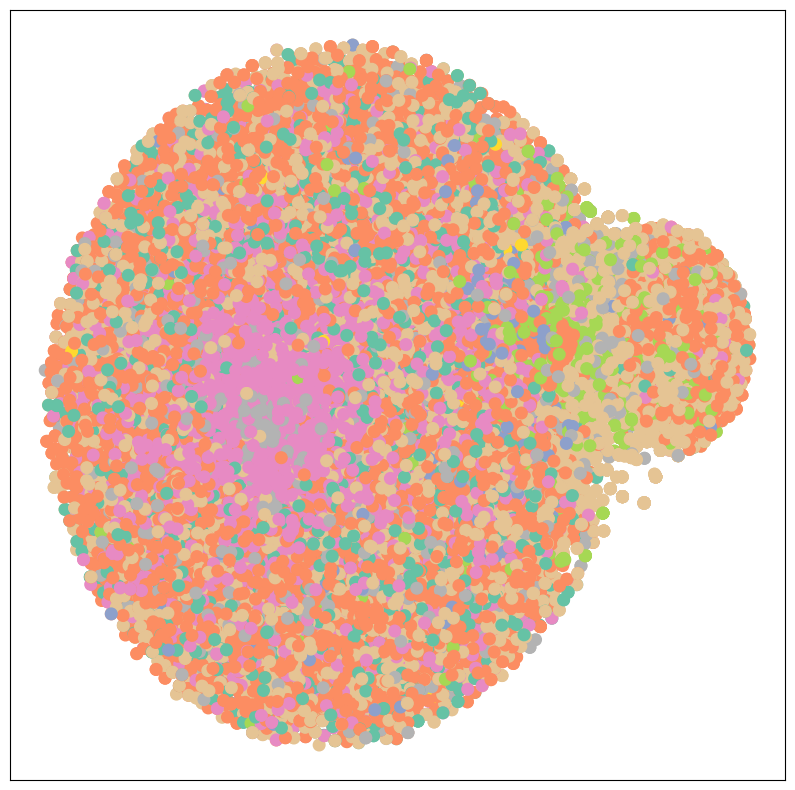

In [ ]:
visualize(node_embedding,node_types)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, node_types):
    z = TSNE(n_components=2).fit_transform(h)

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    unique_node_types = np.unique(node_types)
    palette = sns.color_palette("tab20", len(unique_node_types))

    # Create a dictionary mapping each node type to a color
    node_type_to_color = {node_type: palette[i] for i, node_type in enumerate(unique_node_types)}

    # Map the colors for each node based on its type
    node_colors = [node_type_to_color[node_type] for node_type in node_types]
    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=node_colors, cmap="tab20")




    # Create legend manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in palette]
    plt.legend(handles, unique_node_types, title="Node Types", loc='best')
    plt.show()

In [6]:
y= nodes_df['type'].astype('category').cat.codes

/tmp/ipykernel_85178/1780641566.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=node_colors, cmap="tab20")


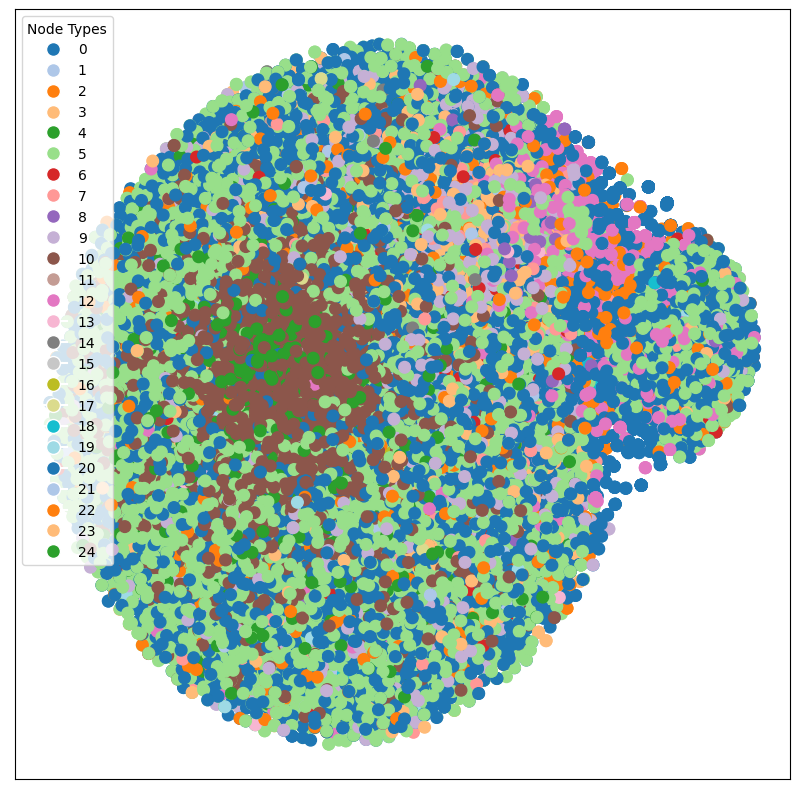

In [12]:
visualize(embeddings.values,y)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prepare the labels
true_labels = nodes_df['type']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare the features and labels
X = node_embedding.values
y = true_labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.4856
Precision: 0.4745
Recall: 0.4856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

selected_classes = ['miRNA', 'Gene', 'Disease']

filtered_embeddings = []
filtered_labels = []


for class_label in selected_classes:

    class_indices = nodes_df[nodes_df['type'] == class_label].index


    class_embeddings = embeddings.iloc[class_indices, 1:].values  # Skip the first column with identifiers

    # Append the filtered embeddings and labels
    filtered_embeddings.append(class_embeddings)
    filtered_labels.extend([class_label] * len(class_embeddings))


X_filtered = np.vstack(filtered_embeddings)

# Encode the labels
le = LabelEncoder()
y_filtered = le.fit_transform(filtered_labels)  # Convert the labels into numerical form


X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

precision_per_class = precision_score(y_test, y_pred, average=None, labels=np.unique(y_filtered))
recall_per_class = recall_score(y_test, y_pred, average=None, labels=np.unique(y_filtered))

for i, class_label in enumerate(le.classes_):
    if class_label in selected_classes:
        print(f"Class: {class_label}")
        print(f"  Precision: {precision_per_class[i]:.4f}")
        print(f"  Recall: {recall_per_class[i]:.4f}")


Accuracy: 0.7899
Precision: 0.7874
Recall: 0.7899
Class: Disease
  Precision: 0.8104
  Recall: 0.9153
Class: Gene
  Precision: 0.7631
  Recall: 0.8027
Class: miRNA
  Precision: 0.7688
  Recall: 0.1003


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features and labels
X = embeddings.values
y = true_labels

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.48530982905982906
Classification Report:


/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                           precision    recall  f1-score   support

                  Anatomy       0.12      0.00      0.01      1772
                     Cell       0.00      0.00      0.00       364
                 Chemical       0.36      0.02      0.05       661
               Chromosome       0.00      0.00      0.00        93
                  Disease       0.41      0.74      0.53      7344
              Environment       0.00      0.00      0.00       141
   Environmental exposure       0.00      0.00      0.00       131
                     Food       0.00      0.00      0.00        50
                       GO       0.35      0.07      0.12      1169
                     Gene       0.70      0.80      0.75      5831
  General medical science       0.00      0.00      0.00         2
          Genomic feature       0.71      0.29      0.41       742
Human developmental stage       0.00      0.00      0.00        19
           Medical action       0.00      0.00      0.00     

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare the labels
true_labels = nodes_df['type']
X =  embeddings.values

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(true_labels)  # Convert the labels into numerical form

class_distribution = np.bincount(y)
print("Class distribution:", dict(zip(le.classes_, class_distribution)))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42,  class_weight='balanced')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and f1-score for each class (node type)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print the overall accuracy
print(f"Overall Accuracy: {accuracy:.4f}")

for i, class_label in enumerate(le.classes_):
    try:
        precision_class = precision_score(y_test, y_pred, labels=[i], average='macro')
        recall_class = recall_score(y_test, y_pred, labels=[i], average='macro')
        f1_class = f1_score(y_test, y_pred, labels=[i], average='macro')
        print(f"Class: {class_label}")
        print(f"  Precision: {precision[i]:.4f}")
        print(f"  Recall: {recall[i]:.4f}")
        print(f"  F1 Score: {f1[i]:.4f}")
    except IndexError:
        print(f"Class: {class_label}")
        print("  Precision: 0.0000 (No predictions for this class)")
        print("  Recall: 0.0000")
        print("  F1 Score: 0.0000")

Class distribution: {'Anatomy': 6084, 'Basic formal': 1, 'Cell': 1272, 'Chemical': 2239, 'Chromosome': 310, 'Disease': 24203, 'Environment': 453, 'Environmental exposure': 419, 'Food': 181, 'GO': 4050, 'Gene': 19517, 'General medical science': 6, 'Genomic feature': 2391, 'Human developmental stage': 72, 'Medical action': 114, 'Mental disease': 12, 'Mental functioning': 14, 'Mouse pathology': 75, 'NCI thesaurus': 84, 'Neuro behaviour': 153, 'Phenotype': 19152, 'Protein': 205, 'Species': 1784, 'Vaccine': 1, 'miRNA': 4565}


/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/sit

Overall Accuracy: 0.4771
Class: Anatomy
  Precision: 0.0952
  Recall: 0.0011
  F1 Score: 0.0022
Class: Basic formal
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Cell
  Precision: 0.3529
  Recall: 0.0091
  F1 Score: 0.0177
Class: Chemical
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Chromosome
  Precision: 0.3988
  Recall: 0.7557
  F1 Score: 0.5221
Class: Disease
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Environment
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000


/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/sit

Class: Environmental exposure
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Food
  Precision: 0.4128
  Recall: 0.0385
  F1 Score: 0.0704
Class: GO
  Precision: 0.6734
  Recall: 0.8009
  F1 Score: 0.7316
Class: Gene
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: General medical science
  Precision: 0.8204
  Recall: 0.2278
  F1 Score: 0.3565
Class: Genomic feature
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Human developmental stage
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Medical action
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000


/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/sit

Class: Mental disease
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Mental functioning
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Mouse pathology
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: NCI thesaurus
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Neuro behaviour
  Precision: 0.3965
  Recall: 0.3259
  F1 Score: 0.3578
Class: Phenotype
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
Class: Protein
  Precision: 1.0000
  Recall: 0.0190
  F1 Score: 0.0374
Class: Species
  Precision: 0.7232
  Recall: 0.1186
  F1 Score: 0.2038
Class: Vaccine
Class: Vaccine
  Precision: 0.0000 (No predictions for this class)
  Recall: 0.0000
  F1 Score: 0.0000
Class: miRNA
Class: miRNA
  Precision: 0.0000 (No predictions for this class)
  Recall: 0.0000
  F1 Score: 0.0000


/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
rna_kg_graph = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=False,
    name=view_name,
)

rna_kg_graph_directed = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=True,
    name=view_name+"_directed",
)

In [7]:
embeddings = pd.read_csv('/home/khushboo/embeddings/node_embeddings_view3_rotate.csv', header = None)

In [8]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,('<http://purl.obolibrary.org/obo/HP_0010945>'...,0.010999,0.004352,-0.007284,0.006952,0.001462,-0.008931,-0.026466,0.018147,-0.007626,...,0.010200,-0.005217,-0.005584,0.005456,0.003444,0.011229,0.004937,-0.015271,0.015479,0.009401
1,('<https://www.mirbase.org/mature/MIMAT0027026...,0.002763,-0.000836,0.000089,0.000458,0.000514,0.003693,0.000768,0.015509,0.000554,...,0.002989,-0.001553,-0.000804,-0.000152,0.002071,0.000993,-0.000142,0.003548,0.000641,-0.002175
2,('<http://purl.obolibrary.org/obo/MONDO_000099...,-0.009923,-0.009360,-0.013370,-0.012027,-0.009054,-0.011830,0.013704,0.006203,0.010955,...,0.014322,-0.011438,-0.004196,-0.003434,0.006114,0.009450,0.007296,-0.002534,0.010708,-0.006109
3,('<http://purl.obolibrary.org/obo/UBERON_00038...,0.002709,0.008343,-0.017172,-0.016497,-0.002342,-0.010879,0.006752,-0.004240,0.003647,...,0.015677,0.004527,0.009754,-0.015694,0.019754,-0.006944,-0.011318,0.010797,0.000330,-0.017741
4,('<https://www.mirbase.org/hairpin/MI0031521>'...,0.013876,0.000876,-0.012531,0.000436,0.008507,-0.002234,0.007659,0.009630,-0.002000,...,-0.005460,0.010662,-0.004599,-0.001817,-0.002106,-0.008668,-0.005851,0.006243,0.006010,0.011329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87352,('<http://purl.obolibrary.org/obo/MONDO_002163...,-0.001865,0.000788,0.001188,-0.000039,0.006074,0.003442,-0.001059,0.013851,0.002135,...,0.001939,-0.002524,-0.000015,0.003036,-0.001491,-0.002326,0.002105,0.001868,-0.002135,-0.002377
87353,('<http://purl.obolibrary.org/obo/MONDO_001274...,-0.017835,-0.013733,0.017105,-0.018374,-0.017120,0.016615,-0.019534,-0.001821,-0.014096,...,0.013716,-0.009433,-0.017446,0.015980,-0.012848,-0.019022,0.011987,-0.010174,-0.013436,0.014303
87354,"('<http://www.ncbi.nlm.nih.gov/gene/80099>', '...",0.010563,-0.010235,0.005693,0.018114,-0.016165,0.017744,-0.011255,-0.002730,-0.010018,...,-0.024660,0.002732,0.002989,-0.007741,0.009306,-0.013658,-0.014696,0.012738,-0.014854,0.006541
87355,('<http://purl.obolibrary.org/obo/HP_0100788>'...,0.004031,0.013795,-0.003396,-0.005662,0.014011,-0.015522,0.010603,-0.004424,-0.017819,...,0.011241,-0.005569,-0.009756,-0.007041,-0.007369,-0.003751,-0.002337,0.014883,0.015507,0.010554


In [9]:
embeddings.set_index(embeddings.columns[0], inplace=True)

In [10]:
embeddings.values

array([[ 1.0999110e-02,  4.3515107e-03, -7.2841870e-03, ...,
        -1.5270563e-02,  1.5478884e-02,  9.4008325e-03],
       [ 2.7630930e-03, -8.3642690e-04,  8.8621140e-05, ...,
         3.5483465e-03,  6.4100290e-04, -2.1746329e-03],
       [-9.9227680e-03, -9.3603460e-03, -1.3370258e-02, ...,
        -2.5338223e-03,  1.0708099e-02, -6.1091213e-03],
       ...,
       [ 1.0562720e-02, -1.0234978e-02,  5.6929346e-03, ...,
         1.2738404e-02, -1.4854298e-02,  6.5409660e-03],
       [ 4.0307210e-03,  1.3795205e-02, -3.3958630e-03, ...,
         1.4882825e-02,  1.5506799e-02,  1.0553677e-02],
       [-1.5609914e-03,  2.4049262e-02, -6.6890423e-03, ...,
         4.8904220e-03,  6.3796440e-03, -9.3758300e-03]])

In [11]:
graph = rna_kg_graph_directed
# Function to simplify node names
def simplify_node_names(graph):
    simplified_node_names = [name[0] for name in graph.get_node_names()]
    return simplified_node_names

# Apply to the graph
simplified_node_names = simplify_node_names(graph)

In [12]:
embeddings.index = [name[0] for name in embeddings.index]

In [13]:
evaluation = edge_prediction_evaluation(
    holdouts_kwargs=dict(train_size=0.8),
    graphs=graph,
    models=[RandomForestEdgePrediction()],
    number_of_holdouts=5,
    node_features=embeddings.values,  # Use simplified embedding features
    smoke_test=False,
    enable_cache=False
)

Evaluating on VIEW3_directed:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [22]:
results = pd.concat([results, evaluation], ignore_index = True)
filename = "results_"+view_name+"_FirstOrderLINE_rotate.csv"
results.to_csv(filename)

In [20]:
results

,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,markedness,accuracy,recall,threat_score,precision,positive_likelyhood_ratio,...,"(model_parameters, max_features)","(model_parameters, max_leaf_nodes)","(model_parameters, min_impurity_decrease)","(model_parameters, bootstrap)","(model_parameters, oob_score)","(model_parameters, n_jobs)","(model_parameters, verbose)","(model_parameters, warm_start)","(model_parameters, ccp_alpha)","(model_parameters, max_samples)"
0,train,0.8,1.0,True,-0.004429,0.499591,0.048074,0.045833,0.495785,0.983283,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
1,test,0.8,1.0,True,-0.056025,0.495328,0.038920,0.037128,0.446417,0.806414,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
2,train,0.8,1.0,True,-0.001496,0.499862,0.048324,0.046085,0.498577,0.994324,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
3,test,0.8,1.0,True,-0.063819,0.494725,0.037917,0.036164,0.438937,0.782332,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
4,train,0.8,1.0,True,-0.001036,0.499905,0.048239,0.046011,0.499014,0.996066,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
5,test,0.8,1.0,True,-0.064335,0.494625,0.038305,0.036514,0.438475,0.780864,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
6,train,0.8,1.0,True,-0.012975,0.498687,0.052136,0.049429,0.487719,0.952053,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
7,test,0.8,1.0,True,-0.082040,0.492614,0.039862,0.037797,0.421836,0.729613,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
8,train,0.8,1.0,True,-0.003204,0.499705,0.048151,0.045913,0.496952,0.987880,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
9,test,0.8,1.0,True,-0.058959,0.495092,0.038611,0.036828,0.443607,0.797290,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None


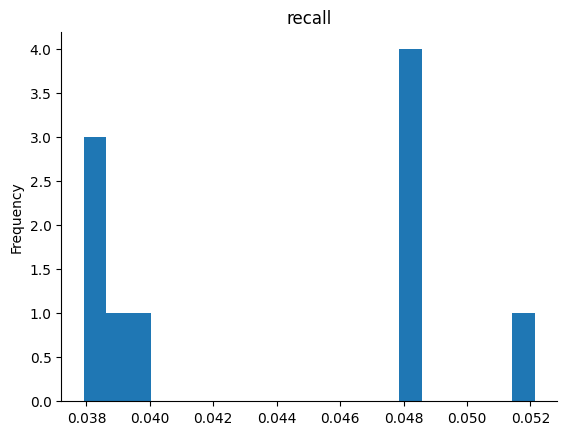

In [21]:
from matplotlib import pyplot as plt
results['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
evaluation = edge_prediction_evaluation(
    holdouts_kwargs=dict(train_size=0.8),
    graphs=graph,
    models=[DecisionTreeEdgePrediction()],
    number_of_holdouts=5,
    node_features=embeddings.values,  # Use simplified embedding features
    smoke_test=False
)


In [15]:
results = evaluation
filename = "results_"+view_name+"_FirstOrderLINE_DesicionTree.csv"
results.to_csv(filename)

In [16]:
results

,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,accuracy,fall_out,diagnostic_odds_ratio,fowlkes_mallows_index,recall,precision,...,"(model_parameters, criterion)","(model_parameters, splitter)","(model_parameters, max_depth)","(model_parameters, min_samples_split)","(model_parameters, min_samples_leaf)","(model_parameters, min_weight_fraction_leaf)","(model_parameters, max_features)","(model_parameters, max_leaf_nodes)","(model_parameters, min_impurity_decrease)","(model_parameters, ccp_alpha)"
0,train,0.8,1.0,True,0.532283,0.637254,1.339797,0.606490,0.701821,0.524109,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.533217,0.637887,1.352235,0.607940,0.704322,0.524748,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.528223,0.512830,1.255539,0.547253,0.569276,0.526081,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.523974,0.514416,1.212985,0.541944,0.562365,0.522265,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.530050,0.512688,1.274399,0.549774,0.572789,0.527684,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.527742,0.513595,1.250702,0.546921,0.569080,0.525624,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.529304,0.689406,1.337373,0.623905,0.748015,0.520387,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.531334,0.688528,1.365820,0.626057,0.751196,0.521764,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
0,train,0.8,1.0,True,0.530166,0.688449,1.348834,0.624585,0.748781,0.520989,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0
1,test,0.8,1.0,True,0.533828,0.687842,1.402287,0.628853,0.755498,0.523437,...,gini,best,10,2,1,0.0,sqrt,None,0.0,0.0


In [17]:
# Separate train and test results
train_results = evaluation[evaluation['evaluation_mode'] == 'train']
test_results = evaluation[evaluation['evaluation_mode'] == 'test']

# Function to compute mean metrics for a given evaluation mode
def compute_mean_metrics(data, mode):
    results = []
    for holdout in data['holdout_number'].unique():
        holdout_data = data[data['holdout_number'] == holdout]

        # Calculate mean values for metrics
        auc_score = holdout_data['auroc'].mean()
        precision = holdout_data['precision'].mean()
        recall = holdout_data['recall'].mean()
        f1_score = holdout_data['f1_score'].mean()
        accuracy = holdout_data['accuracy'].mean()  # Assuming 'accuracy' column exists

        # Append results for this holdout
        results.append({
            'Holdout': holdout,
            'AUC': auc_score,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Accuracy': accuracy
        })

    # Convert to DataFrame
    return pd.DataFrame(results)

# Compute metrics for train and test
train_metrics_df = compute_mean_metrics(train_results, 'Train')
test_metrics_df = compute_mean_metrics(test_results, 'Test')    

# Calculate overall mean for train and test
overall_train_mean = train_metrics_df.mean(numeric_only=True)
overall_test_mean = test_metrics_df.mean(numeric_only=True)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Evaluation Mode': ['Train', 'Test'],
    'AUC': [overall_train_mean['AUC'], overall_test_mean['AUC']],
    'Precision': [overall_train_mean['Precision'], overall_test_mean['Precision']],
    'Recall': [overall_train_mean['Recall'], overall_test_mean['Recall']],
    'F1 Score': [overall_train_mean['F1 Score'], overall_test_mean['F1 Score']],
    'Accuracy': [overall_train_mean['Accuracy'], overall_test_mean['Accuracy']]
})

# Display the summary of mean metrics
print(summary_df)


  Evaluation Mode       AUC  Precision    Recall  F1 Score  Accuracy
0           Train  0.610977   0.523850  0.668136   0.58489  0.530005
1            Test  0.607677   0.523568  0.668492   0.58474  0.530019
